# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
def load_countries(file):
    countries = pd.read_csv(file)
    new_column_names = [
        "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
        "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
        "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
        "Industry", "Service"
    ]
    countries.columns = new_column_names
    return countries

In [3]:
countries = load_countries("countries.csv")
countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [4]:
missing = (countries.isnull().mean() * 100).to_frame(name='missing(%)')
missing[missing['missing(%)'] > 0]

,missing(%)
Net_migration,1.321586
Infant_mortality,1.321586
GDP,0.440529
Literacy,7.929515
Phones_per_1000,1.762115
Arable,0.881057
Crops,0.881057
Other,0.881057
Climate,9.691630
Birthrate,1.321586


In [5]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density          object
Coastline_ratio      object
Net_migration        object
Infant_mortality     object
GDP                 float64
Literacy             object
Phones_per_1000      object
Arable               object
Crops                object
Other                object
Climate              object
Birthrate            object
Deathrate            object
Agriculture          object
Industry             object
Service              object
dtype: object

In [6]:
def object_to_numeric():
    #Seleciona todas colunas numéricas tratadas como object
    to_replace_commas = countries.loc[:, countries.columns[2:]].select_dtypes(include='object').columns

    correct_dtypes = {
        "Country": object, 
        "Region": object, 
        "Population": int, 
        "Area": int, 
        "Pop_density": float, 
        "Coastline_ratio": float,
        "Net_migration": float, 
        "Infant_mortality": float, 
        "GDP": float, 
        "Literacy": float, 
        "Phones_per_1000": float, 
        "Arable": float, 
        "Crops": float, 
        "Other": float, 
        "Climate": float, 
        "Birthrate": float, 
        "Deathrate": float, 
        "Agriculture": float,
        "Industry": float, 
        "Service": float
    }

    for it in to_replace_commas:
        countries[it] = countries[it].str.replace(',', '.')

    for k, v in correct_dtypes.items():
        countries[k] = countries[k].astype(v)

def removes_blank_spaces():
    for it in ['Country', 'Region']:
        countries[it] = countries[it].str.strip()

In [7]:
object_to_numeric()
removes_blank_spaces()
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
countries.dtypes

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [9]:
def q1():
    unique_regions = np.sort(countries['Region'].unique())
    return list(unique_regions)
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [10]:
def q2():
    from sklearn.preprocessing import KBinsDiscretizer
    k_bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    k_bins.fit(countries[['Pop_density']])
    bins = k_bins.transform(countries[['Pop_density']])
   
    return  int(sum(bins[:, 0] >= 9))
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [11]:
def q3():
    from sklearn.preprocessing import OneHotEncoder
    df = countries[['Region', 'Climate']].copy()
    df = df.fillna(0)
    encoder = OneHotEncoder(sparse=False, dtype=np.int)  
    features_encoded = encoder.fit_transform(df)
    return int(features_encoded.shape[1])
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [12]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [13]:
def q4():
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import StandardScaler
    
    X_train = countries.select_dtypes(include=['int','float']).copy()
    X_test = pd.DataFrame(
        [test_country], 
        columns=countries.columns
    ).select_dtypes(
        include=['int', 'float']
    )
    arable_loc = X_train.columns.get_loc('Arable')
    
    pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ])
    pipe_fit = pipe.fit(X_train)
    
    pipe_transformed = pipe_fit.transform(X_test)
       
    return  round(float(pipe_transformed[:, arable_loc]), 3)
    
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [14]:
#Algumas configurações para o matplotlib.
%matplotlib inline
from IPython.core.pylabtools import figsize
import seaborn as sns
figsize(12, 8)
sns.set()

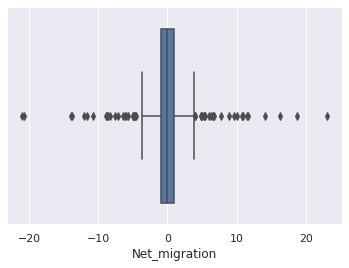

In [15]:
sns.boxplot(countries['Net_migration']);

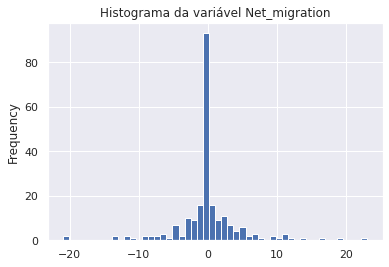

In [16]:
countries['Net_migration'].plot.hist(
  bins = 50,
  title = "Histograma da variável Net_migration"
);

In [14]:
def q5():
    net_migration = countries['Net_migration'].copy()    
    q1 = net_migration.quantile(0.25)
    q3 = net_migration.quantile(0.75)
    iqr = q3 - q1
    upper_outliers = [it for it in net_migration if it > (q3 + 1.5 * iqr)]
    bottom_outliers = [it for it in net_migration if it < (q1 - 1.5 * iqr)]
    return (len(bottom_outliers), len(upper_outliers), False)

In [15]:
r = q5()
print(f'{round((r[0] + r[1]) / countries.shape[0] * 100, 3)}% de outliers')

22.026% de outliers


**Não removeria os outliers a princípio. Precisaria fazer uma análise criteriosa, alguns testes, pois representa uma boa porção das observações.**

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [16]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [17]:
def q6():
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    newsgroup_count = vectorizer.fit_transform(newsgroup.data)
    return int(newsgroup_count[:, vectorizer.vocabulary_.get('phone')].sum())
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [18]:
def q7():
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer()
    newsgroup_tfidf = vectorizer.fit_transform(newsgroup.data)
    return float(round(newsgroup_tfidf[:, vectorizer.vocabulary_.get('phone')].sum(), 3))
q7()

8.888

In [19]:
!codenation submit -c data-science-4

Versão: 1.0.14

Usando arquivo de configuração: /home/flavia/.codenation.yml

Executando testes...

[NbConvertApp] Converting notebook main.ipynb to script
[NbConvertApp] Writing 8685 bytes to main.py
============================= test session starts ==============================
platform linux -- Python 3.6.9, pytest-4.6.2, py-1.8.0, pluggy-0.12.0 -- /home/flavia/codenation/venv-codenatio-ds/bin/python
cachedir: .pytest_cache
rootdir: /home/flavia/codenation/data-science-4
collecting ... collected 7 items

test_submit.py::test_q1 PASSED                                           [ 14%]
test_submit.py::test_q2 PASSED                                           [ 28%]
test_submit.py::test_q3 PASSED                                           [ 42%]
test_submit.py::test_q4 PASSED                                           [ 57%]
test_submit.py::test_q5 PASSED                                           [ 71%]
test_submit.py::test_q6 PASSED                                           [ 85%]
test_s